In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mlxtend.plotting import scatterplotmatrix
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.metrics.cluster import completeness_score
import datetime
import math

In [2]:
df = pd.read_csv("C:/Users/Victus/Desktop/apple.csv", delimiter=',', low_memory=False)
i = 0
for value in df['Date'].values:
    df['Date'].values[i] = datetime.datetime.strptime(df['Date'].values[i], '%Y-%m-%d')
    i = i + 1
print(df)

                     Date        Open        High         Low       Close  \
0     2017-02-22 00:00:00  136.429993  137.119995  136.110001  137.110001   
1     2017-02-21 00:00:00  136.229996  136.750000  135.979996  136.699997   
2     2017-02-17 00:00:00  135.100006  135.830002  135.100006  135.720001   
3     2017-02-16 00:00:00  135.669998  135.899994  134.839996  135.350006   
4     2017-02-15 00:00:00  135.520004  136.270004  134.619995  135.509995   
...                   ...         ...         ...         ...         ...   
1253  2012-02-29 00:00:00  541.560005  547.610023  535.700005  542.440025   
1254  2012-02-28 00:00:00  527.960014  535.410011  525.850006  535.410011   
1255  2012-02-27 00:00:00  521.309982  528.500000  516.280014  525.760017   
1256  2012-02-24 00:00:00  519.669998  522.899979  518.640015  522.409981   
1257  2012-02-23 00:00:00  515.079987  517.830009  509.499992  516.389977   

         Volume   Adj Close  
0      20745300  137.110001  
1      24265100

In [3]:
print(np.mean(df['Open'].values))
print(np.var(df['Open'].values))

304.37754407869636
46904.43750005488


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB
None


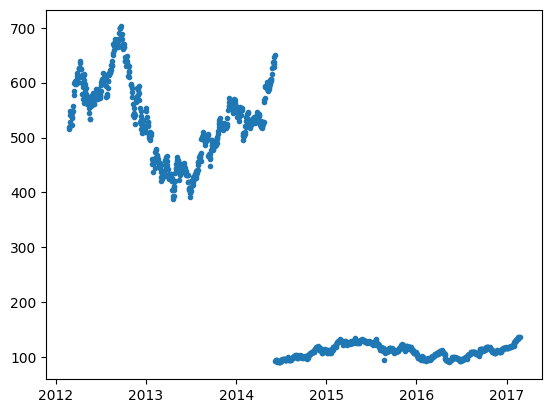

In [5]:
#График, грузит долго
plt.plot(df['Date'].values, df['Open'].values, '.')

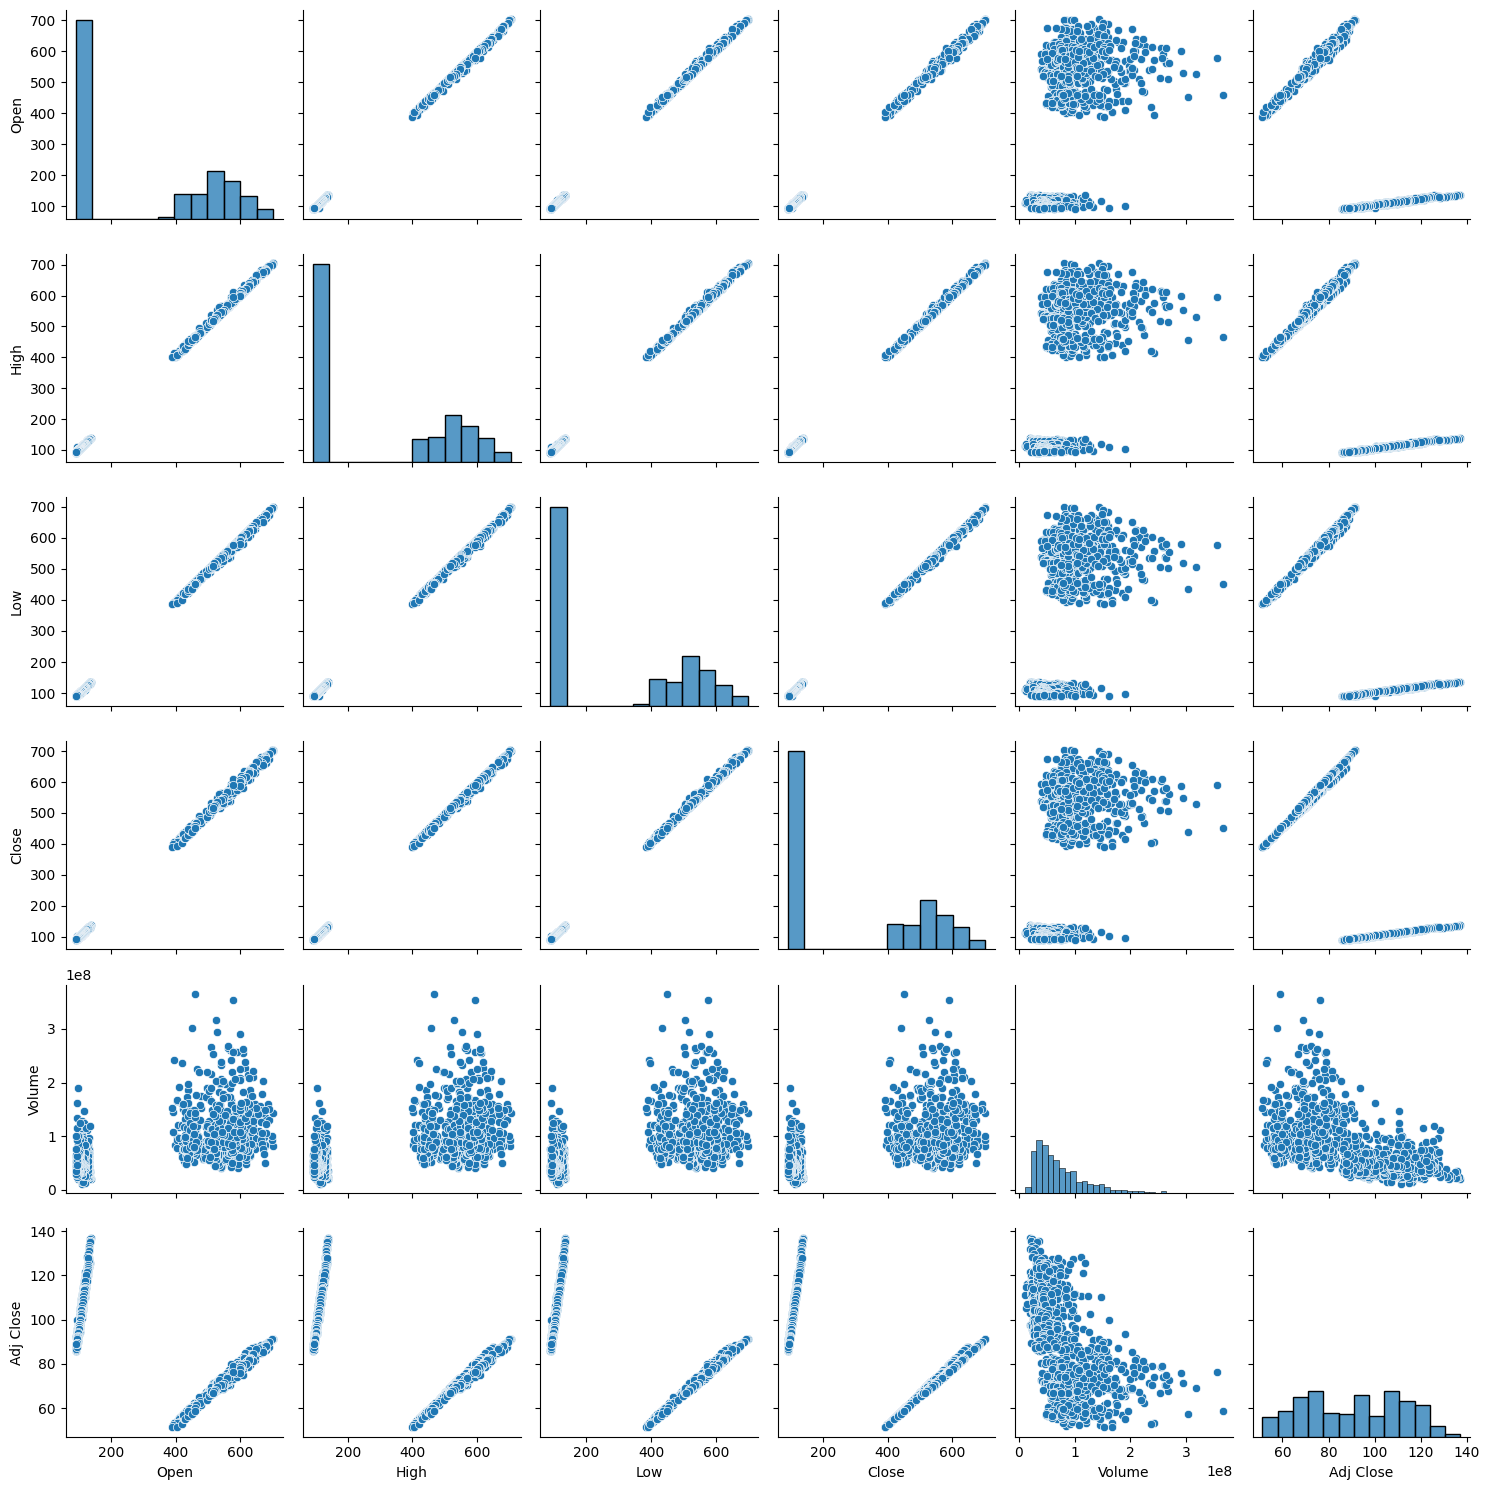

In [6]:
#Матрица диаграмм рассеивания
sb.pairplot(df) 
plt.tight_layout()

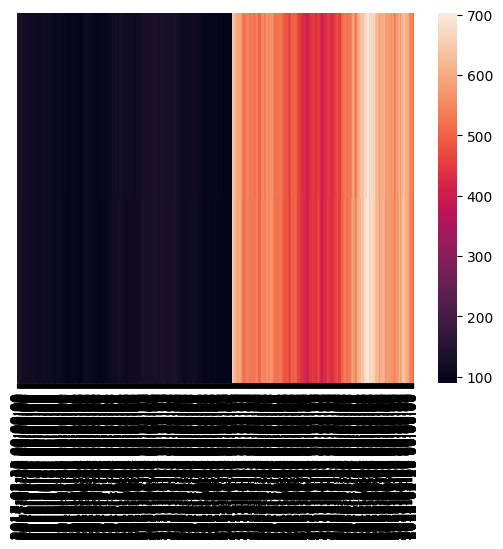

In [7]:
#Колормап, не работает
year_list = []

for value in df['Date'].values:
    for year in year_list:
        if value.year != year:
            pass
        else:
            break
    else:
        year_list.append(value.year)
        
month_list = []

for value in df['Date'].values:
    for month in month_list:
        if value.month != month:
            pass
        else:
            break
    else:
        month_list.append(value.month)
        
snsdf = [df['Close'].values, df['Open'].values]
xtick = df['Date'].values
heatm = sb.heatmap(data = snsdf, xticklabels = xtick, yticklabels = False)

In [8]:
print(df.Open.max())
print(df.Open.min())
print(df.Open.mean())
print(df.Open.median())

702.409988
90.0
304.37754407869636
128.3050005


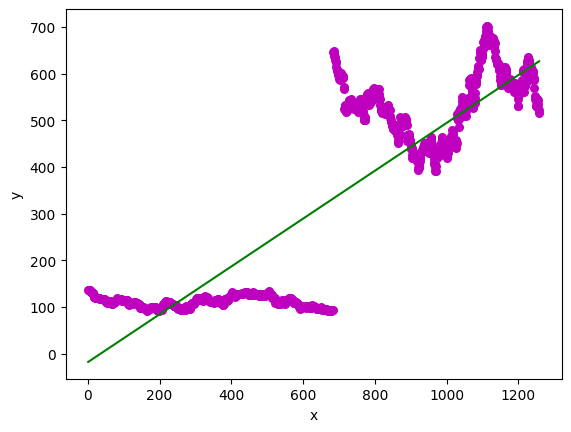

In [9]:
def estimate_coef(x, y):
  # number of observations/points
  n = np.size(x)
 
  # mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)
 
  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x
 
  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x
 
  return (b_0, b_1)

def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",
        marker = "o", s = 30)
 
  # predicted response vector
  y_pred = b[0] + b[1]*x
 
  # plotting the regression line
  plt.plot(x, y_pred, color = "g")
 
  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')
#############################################################
#############################################################
#############################################################
#Рисование функции регрессии
range_x = range(1, len(df['Date'].values)+1)
xx = []
xx.extend(range_x)
x = np.array(xx)
y = df['Close']
plot_regression_line(x, y, estimate_coef(x, y))
plt.show()

In [10]:
year_list = []

for value in df['Date'].values:
    for year in year_list:
        if value.year != year:
            pass
        else:
            break
    else:
        year_list.append(value.year)
        
month_list = []

for value in df['Date'].values:
    for month in month_list:
        if value.month != month:
            pass
        else:
            break
    else:
        month_list.append(value.month)
        
current_difference = 0
max_date = df['Date'].values[0]
current_min = 0
current_max = 0
for year in year_list:
    for month in month_list:
        day_list = []
        for value in df['Date'].values:
            if value.year == year and value.month == month:
                for day in day_list:
                    if value.day != day:
                        pass
                    else:
                        break
                else:
                    day_list.append(value.day)
        if len(day_list) > 0:
            i = 0
            k = 0
            current_min = 0
            current_max = 0
            for value in df['Date'].values:
                if value.year == year and value.month == month: 
                    
                    if value.day == max(day_list):
                        #print(day_list)
                        #print(year, month)
                        current_max = df['Close'].values[i]
                        k = i
                        
                    if value.day == min(day_list):
                        current_min = df['Open'].values[i]
                        #print(current_max)
                        #print(current_min)
                        
                i = i + 1
            if current_max - current_min > current_difference:
                current_difference = (current_max - current_min)
                max_date = df['Date'].values[k]
                #print(max_date)
                #print(current_difference)
print(max_date)
print(current_difference)

2014-04-30 00:00:00
52.329955999999925


In [11]:
work_day_list = [31, 30, 27, 26, 25, 24, 23, 20, 19, 18, 17, 16, 13, 12, 11, 10, 9, 6, 5, 4, 3, 2] 
work_day_list_chekpoints = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
year = 2017
month = 1
i = 0
for day in work_day_list:
    for value in df['Date'].values:
        if value.year == year and value.month == month and value.day == day: 
            work_day_list_chekpoints[i] = 1
    i = i + 1
print(work_day_list_chekpoints)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [12]:
i = 0
for day in work_day_list_chekpoints:
    if day == 0:
        information = []
        information.append(datetime.datetime.strptime(str(year)+'-'+str(month)+'-'+str(work_day_list[i]), '%Y-%m-%d'))
        k = 0
        for value in df['Date'].values:
            #if value.year == year and value.month == month:
            #    print(value.day, work_day_list[i-1])
            if value.year == year and value.month == month and value.day == work_day_list[i-1]:
                Open = (df['Open'].values[k] + df['Open'].values[k+2])/2
                high = (df['High'].values[k] + df['High'].values[k+2])/2
                low = (df['Low'].values[k] + df['Low'].values[k+2])/2
                close = (df['Close'].values[k] + df['Close'].values[k+2])/2
                volume = (df['Volume'].values[k] + df['Volume'].values[k+2])/2
                adj_close = (df['Adj Close'].values[k] + df['Adj Close'].values[k+2])/2
                information.append(Open)
                information.append(high)
                information.append(low)
                information.append(close)
                information.append(volume)
                information.append(adj_close)
                print(information)
            k = k + 1
    i = i + 1     

[datetime.datetime(2017, 1, 18, 0, 0), 119.0625, 120.009998, 118.942501, 119.64999975, 27936575.0, 119.1334865]
[datetime.datetime(2017, 1, 3, 0, 0), 116.25, 116.85499949999999, 115.59, 115.91999849999999, 25852200.0, 115.419587]
